xの値: [0.         1.57079633 3.14159265 4.71238898 6.28318531]
yの値: [ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00
 -2.4492936e-16]


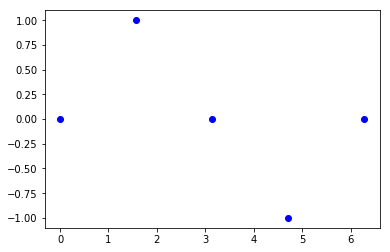

In [109]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

#サンプルデータ数の指定
n = 5
#xを0から2πまでの範囲でn分割を行う
x = np.linspace(0, 2*np.pi, n)
print('xの値:', x)
#xをsin関数に入れて出力値を変数yとする
y = np.sin(x)
print('yの値:', y)
sin = pd.Series(y, index=x)
#x,yのプロット
plt.plot(x, y, 'bo') 

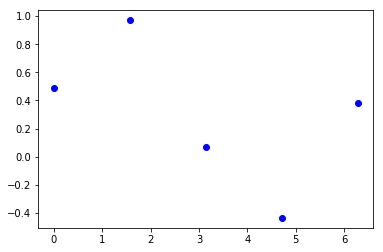

In [110]:
#ノイズありのデータを生成
noise = sin + 0.3 * np.random.randn(n)

#オリジナルの点にノイズを加えた点のプロット
plt.plot(x, noise, 'bo') 

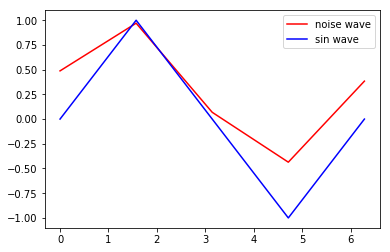

In [111]:
##ノイズなしの点とノイズ有りの点の比較
sdf = pd.DataFrame({'sin wave': sin, 'noise wave': noise})
sdf.plot(color=('r','b'))

In [112]:
#データセットを学習用とテスト用に分割
#※今回は全データを学習データに使うため、必要ないが、これはよく使う関数なめ記述
#text_size=0.0を好きな割合に変えることにより、その割合で学習データとテストデータに分割できる
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size=0.0, random_state=0)
print('x_train:', x_train)
print('y_train', y_train)

x_train: [3.14159265 0.         1.57079633 4.71238898 6.28318531]
y_train [ 1.2246468e-16  0.0000000e+00  1.0000000e+00 -1.0000000e+00
 -2.4492936e-16]


In [113]:
###多項式回帰の実装(M = 0)
#パラメータの初期化
w = np.random.rand(1)
print(w)

#データの標準化を行うための準備
mu = x_train.mean()
sigma = x_train.std()
#標準化を行う関数
def standardize(x):
    return (x - mu) / sigma

#データの標準化
z_train = standardize(x_train)

#学習データを行列に変換する関数(定数項は1に設定)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0])]).T

#学習データを行列に変換
X = to_matrix(z_train)
#変換結果の確認
print(X)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

[0.28175915]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [114]:
#学種率を10^(-3)に設定
lr = 1e-3
#カウントを0に設定
count = 0
#最初の誤差を変数errorに代入
error = E(X, y_train)

#countが2000になるまで学習を行う
while count < 2000:
    #パラメータの更新式
    w = w - lr * np.dot(f(X) - y_train, X)
    #パラメータを更新した後の誤差
    current_error = E(X, y_train)
    #前の誤差とパラメータを更新した後の誤差の差
    diff = error - current_error
    #誤差をパラメータ更新後の誤差に更新
    error = current_error
    
    #ログ
    count += 1
    log = '{}回目の損失:{}'
    print(log.format(count, current_error))

1回目の損失:1.1964908077761736
2回目の損失:1.1945308119686062
3回目の損失:1.1925903671192195
4回目の損失:1.1906692782072055
5回目の損失:1.1887673521570883
6回目の損失:1.1868843978193218
7回目の損失:1.1850202259510736
8回目の損失:1.1831746491972117
9回目の損失:1.1813474820714696
10回目の損失:1.1795385409378067
11回目の損失:1.1777476439919523
12回目の損失:1.1759746112431324
13回目の損失:1.1742192644959824
14回目の損失:1.1724814273326347
15回目の損失:1.1707609250949915
16回目の損失:1.1690575848671692
17回目の損失:1.1673712354581192
18回目の損失:1.1657017073844245
19回目の損失:1.1640488328532648
20回目の損失:1.1624124457455534
21回目の損失:1.1607923815992416
22回目の損失:1.1591884775927894
23回目の損失:1.157600572528801
24回目の損失:1.1560285068178264
25回目の損失:1.1544721224623187
26回目の損失:1.152931263040757
27回目の損失:1.1514057736919254
28回目の損失:1.1498955010993483
29回目の損失:1.1484002934758828
30回目の損失:1.1469200005484605
31回目の損失:1.1454544735429895
32回目の損失:1.1440035651693983
33回目の損失:1.1425671296068334
34回目の損失:1.1411450224890054
35回目の損失:1.1397371008896775
36回目の損失:1.138343223308303
37回目の損失:1.1369632496558024
38回目の損失:1.135

1744回目の損失:1.0000000050652595
1745回目の損失:1.0000000050147337
1746回目の損失:1.0000000049647118
1747回目の損失:1.0000000049151887
1748回目の損失:1.0000000048661597
1749回目の損失:1.0000000048176196
1750回目の損失:1.0000000047695639
1751回目の損失:1.0000000047219877
1752回目の損失:1.000000004674886
1753回目の損失:1.0000000046282538
1754回目の損失:1.000000004582087
1755回目の損失:1.0000000045363806
1756回目の損失:1.0000000044911304
1757回目の損失:1.000000004446331
1758回目の損失:1.000000004401979
1759回目の損失:1.0000000043580695
1760回目の損失:1.0000000043145976
1761回目の損失:1.0000000042715596
1762回目の損失:1.0000000042289505
1763回目の損失:1.0000000041867667
1764回目の損失:1.000000004145004
1765回目の損失:1.0000000041036574
1766回目の損失:1.0000000040627235
1767回目の損失:1.000000004022198
1768回目の損失:1.0000000039820764
1769回目の損失:1.0000000039423553
1770回目の損失:1.0000000039030301
1771回目の損失:1.0000000038640977
1772回目の損失:1.0000000038255532
1773回目の損失:1.0000000037873933
1774回目の損失:1.000000003749614
1775回目の損失:1.0000000037122116
1776回目の損失:1.0000000036751824
1777回目の損失:1.0000000036385224
1778回目の損失:1.000000003

In [115]:
#M=0のときの最終誤差
print('最終誤差:', error)

最終誤差: 1.0000000003890621


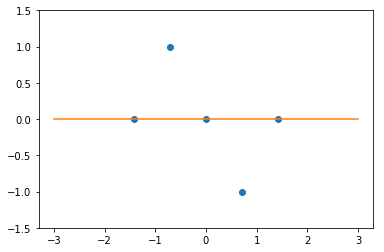

In [116]:
#M=0のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()

In [117]:
###多項式回帰の実装(M = 1)
#パラメータの初期化
w = np.random.rand(2)

#標準化
z_train = standardize(x_train)

#学習データの行列を作成(多項式のMが2のとき)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x]).T

X = to_matrix(z_train)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [118]:
count = 0
error = E(X, y_train)

while count < 2000:
    w = w - lr * np.dot(f(X) - y_train, X)
    current_error = E(X, y_train)
    diff = error - current_error
    error = current_error
    
    #ログ
    count += 1
    log = '{}回目の損失:{}'
    print(log.format(count, current_error))

1回目の損失:2.462536403333149
2回目の損失:2.4459526027099012
3回目の損失:2.42953422549787
4回目の損失:2.4132796215985293
5回目の損失:2.3971871573730836
6回目の損失:2.3812552154782876
7回目の損失:2.3654821947038913
8回目の損失:2.3498665098117204
9回目の損失:2.3344065913763488
10回目の損失:2.31910088562737
11回目の損失:2.303947854293236
12回目の損失:2.288945974446661
13回目の損失:2.2740937383515556
14回目の損失:2.2593896533114988
15回目の損失:2.2448322415197164
16回目の損失:2.2304200399105576
17回目の損失:2.2161516000124495
18回目の損失:2.2020254878023255
19回目の損失:2.1880402835614974
20回目の損失:2.174194581732972
21回目の損失:2.1604869907801847
22回目の損失:2.146916133047153
23回目の損失:2.133480644620007
24回目の損失:2.120179175189923
25回目の損失:2.1070103879174034
26回目の損失:2.093972959297927
27回目の損失:2.0810655790289303
28回目の損失:2.0682869498781167
29回目の損失:2.0556357875530824
30回目の損失:2.0431108205722404
31回目の損失:2.0307107901370323
32回目の損失:2.018434450005415
33回目の損失:2.0062805663666117
34回目の損失:1.9942479177171044
35回目の損失:1.982335294737877
36回目の損失:1.9705415001728661
37回目の損失:1.9588653487086418
38回目の損失:1.94730566685527

1564回目の損失:0.8000002604483283
1565回目の損失:0.8000002578503564
1566回目の損失:0.8000002552782991
1567回目の損失:0.800000252731898
1568回目の損失:0.8000002502108974
1569回目の損失:0.8000002477150437
1570回目の損失:0.800000245244086
1571回目の損失:0.8000002427977764
1572回目の損失:0.8000002403758685
1573回目の損失:0.8000002379781191
1574回目の損失:0.8000002356042875
1575回目の損失:0.8000002332541347
1576回目の損失:0.8000002309274248
1577回目の損失:0.8000002286239237
1578回目の損失:0.8000002263434001
1579回目の損失:0.8000002240856245
1580回目の損失:0.8000002218503705
1581回目の損失:0.8000002196374132
1582回目の損失:0.8000002174465298
1583回目の損失:0.8000002152775008
1584回目の損失:0.8000002131301076
1585回目の損失:0.8000002110041348
1586回目の損失:0.8000002088993686
1587回目の損失:0.8000002068155974
1588回目の損失:0.8000002047526119
1589回目の損失:0.8000002027102044
1590回目の損失:0.8000002006881701
1591回目の損失:0.8000001986863057
1592回目の損失:0.8000001967044099
1593回目の損失:0.8000001947422832
1594回目の損失:0.800000192799729
1595回目の損失:0.8000001908765517
1596回目の損失:0.8000001889725582
1597回目の損失:0.8000001870875568
1598回目の損失:0.80000

In [119]:
#M=1のときの最終誤差
print('最終誤差:', error)

最終誤差: 0.8000000032919102


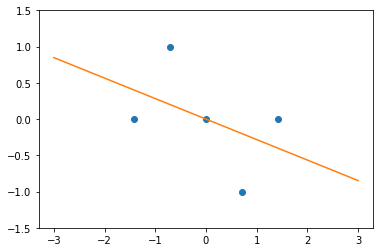

In [120]:
#M=1のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()

In [121]:
###多項式回帰の実装(M = 3)
#パラメータの初期化
w = np.random.rand(4)

train_z = standardize(x_train)

#学習データの行列を作成(多項式のMが2のとき)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2, x ** 3]).T

X = to_matrix(z_train)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [122]:
count = 0
error = E(X, y_train)

while count < 2000:
    w = w - lr * np.dot(f(X) - y_train, X)
    current_error = E(X, y_train)
    diff = np.abs(error - current_error)
    error = current_error
    
    #ログ
    count += 1
    log = '{}回目の損失:{}'
    print(log.format(count, current_error))

1回目の損失:4.373206075999116
2回目の損失:4.283320180047632
3回目の損失:4.195948562714438
4回目の損失:4.111015146024558
5回目の損失:4.028446328779312
6回目の損失:3.9481709002599272
7回目の損失:3.8701199571095
8回目の損失:3.7942268232713654
9回目の損失:3.7204269728667834
10回目の損失:3.6486579558994245
11回目の損失:3.5788593266786064
12回目の損失:3.5109725748574423
13回目の損失:3.4449410589861884
14回目の損失:3.380709942484945
15回目の損失:3.318226131943681
16回目の損失:3.2574382176611056
17回目の損失:3.1982964163374366
18回目の損失:3.140752515839379
19回目の損失:3.0847598219588837
20回目の損失:3.0302731070902698
21回目の損失:2.977248560753276
22回目の損失:2.9256437418924204
23回目の損失:2.875417532885753
24回目の損失:2.8265300951987045
25回目の損失:2.7789428266212446
26回目の損失:2.7326183200289313
27回目の損失:2.687520323610788
28回目の損失:2.643613702509123
29回目の損失:2.600864401818544
30回目の損失:2.5592394108934786
31回目の損失:2.518706728915455
32回目の損失:2.4792353316732783
33回目の損失:2.4407951395110796
34回目の損失:2.403356986400906
35回目の損失:2.366892590098229
36回目の損失:2.3313745233403305
37回目の損失:2.2967761860490716
38回目の損失:2.2630717785010286
39

1480回目の損失:0.27373770585009904
1481回目の損失:0.2734989799953334
1482回目の損失:0.2732604665769283
1483回目の損失:0.2730221653936284
1484回目の損失:0.2727840762444034
1485回目の損失:0.2725461989284475
1486回目の損失:0.27230853324517956
1487回目の損失:0.2720710789942426
1488回目の損失:0.27183383597550304
1489回目の損失:0.27159680398905117
1490回目の損失:0.27135998283519985
1491回目の損失:0.27112337231448497
1492回目の損失:0.27088697222766467
1493回目の損失:0.2706507823757194
1494回目の損失:0.2704148025598509
1495回目の損失:0.27017903258148246
1496回目の損失:0.2699434722422587
1497回目の損失:0.2697081213440443
1498回目の損失:0.2694729796889252
1499回目の損失:0.26923804707920646
1500回目の損失:0.2690033233174133
1501回目の損失:0.26876880820629057
1502回目の損失:0.2685345015488015
1503回目の損失:0.2683004031481287
1504回目の損失:0.26806651280767263
1505回目の損失:0.267832830331052
1506回目の損失:0.2675993555221036
1507回目の損失:0.267366088184881
1508回目の損失:0.26713302812365514
1509回目の損失:0.2669001751429141
1510回目の損失:0.2666675290473615
1511回目の損失:0.26643508964191776
1512回目の損失:0.2662028567317188
1513回目の損失:0.2659708301221162
151

In [123]:
#M=3のときの最終誤差
print('最終誤差:', error)

最終誤差: 0.17416483058848586


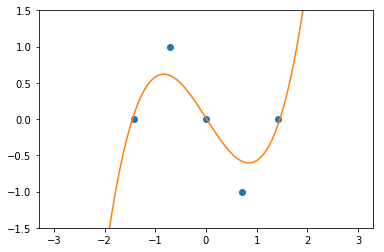

In [124]:
#M=3のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()

In [125]:
###多項式回帰の実装(M = 9)
#パラメータの初期化
w = np.random.rand(10)

train_z = standardize(x_train)

#学習データの行列を作成(多項式のMが2のとき)
def to_matrix(x):
    return np.vstack([np.ones(x.shape[0]), x, x ** 2, x ** 3, x**4, x ** 5, x ** 6, x** 7, x ** 8, x**9]).T

X = to_matrix(z_train)

#予測関数
def f(x):
    return np.dot(x, w)

#誤差関数(損失関数)
def E(x, y):
    return 0.5 * np.sum((y - f(x)) ** 2)

In [126]:
count = 0
error = E(X, y_train)

while count < 2000:
    w = w - lr * np.dot(f(X) - y_train, X)
    current_error = E(X, y_train)
    diff = np.abs(error - current_error)
    error = current_error
    
    #ログ
    count += 1
    log = '{}回目の損失:{}'
    print(log.format(count, current_error))

1回目の損失:85.24987690815433
2回目の損失:13.898586084934609
3回目の損失:5.357689147859084
4回目の損失:4.307298604662818
5回目の損失:4.165459739211125
6回目の損失:4.135576514415097
7回目の損失:4.119722175559087
8回目の損失:4.105690393122105
9回目の損失:4.091941169343349
10回目の損失:4.078278022163425
11回目の損失:4.0646754507800065
12回目の損失:4.051129901819221
13回目の損失:4.037640660039315
14回目の損失:4.024207380564417
15回目の損失:4.010829768358017
16回目の損失:3.9975075363930643
17回目の損失:3.9842404001652363
18回目の損失:3.9710280769631443
19回目の損失:3.9578702857629944
20回目の損失:3.9447667472054895
21回目の損失:3.93171718358362
22回目の損失:3.9187213188319454
23回目の損失:3.9057788785161502
24回目の損失:3.892889589822676
25回目の損失:3.8800531815484383
26回目の損失:3.867269384090592
27回目の損失:3.854537929436393
28回目の損失:3.8418585511530985
29回目の損失:3.8292309843779493
30回目の損失:3.816654965808211
31回目の損失:3.8041302336912817
32回目の損失:3.7916565278148697
33回目の損失:3.7792335894972227
34回目の損失:3.7668611615774394
35回目の損失:3.754538988405826
36回目の損失:3.7422668158343253
37回目の損失:3.7300443912070107
38回目の損失:3.717871463350637
39回目

1452回目の損失:0.08672762404293959
1453回目の損失:0.08650929408142208
1454回目の損失:0.08629151477695758
1455回目の損失:0.08607428473475501
1456回目の損失:0.0858576025635955
1457回目の損失:0.08564146687582333
1458回目の損失:0.08542587628733622
1459回目の損失:0.08521082941757613
1460回目の損失:0.08499632488951983
1461回目の損失:0.08478236132966956
1462回目の損失:0.08456893736804404
1463回目の損失:0.08435605163816874
1464回目の損失:0.08414370277706713
1465回目の損失:0.08393188942525122
1466回目の損失:0.0837206102267124
1467回目の損失:0.08350986382891228
1468回目の損失:0.08329964888277384
1469回目の損失:0.08308996404267187
1470回目の損失:0.08288080796642408
1471回目の損失:0.08267217931528238
1472回目の損失:0.08246407675392338
1473回目の損失:0.08225649895043957
1474回目の損失:0.08204944457633062
1475回目の損失:0.08184291230649378
1476回目の損失:0.08163690081921586
1477回目の損失:0.08143140879616337
1478回目の損失:0.08122643492237447
1479回目の損失:0.08102197788624964
1480回目の損失:0.08081803637954282
1481回目の損失:0.08061460909735317
1482回目の損失:0.08041169473811546
1483回目の損失:0.08020929200359216
1484回目の損失:0.08000739959886422
1485回目の損失:0.

In [127]:
#M=9のときの最終誤差
print('最終誤差:', error)

最終誤差: 0.021816955604644108


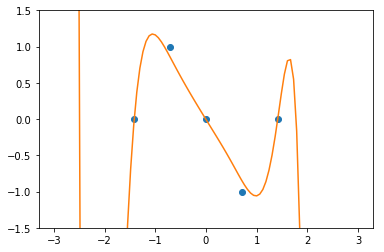

In [128]:
#M=9のときのグラフをプロット
x = np.linspace(-3, 3, 100)
plt.plot(z_train, y_train, 'o')
plt.plot(x, f(to_matrix(x)))
plt.ylim(-1.5, 1.5)
plt.show()